In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from independence import *
from pre_process import *
from figures import plot_categorical_distribution, calculate_distribution
import warnings
warnings.simplefilter("ignore")

#### Data Loadig & Processing

In [11]:
df = data_processing("data/NCDOT_BikePedCrash.csv")
features_df = features_engineer("data/NCDOT_BikePedCrash.csv")

In [3]:
df.head()

,age_category,is_drunk_biker,biker_location,gender,intersection_type,month,severity,is_drunk_driver,vehicle_type,y,light_condition,locality,x,road_condition,road_surface_type,speed_limit,weather
0,11-15,No,Sidewalk / Crosswalk / Driveway Crossing,Male,Non-Intersection,January,B: Suspected Minor Injury,No,Passenger Vehicle,36.039490,Daylight,Urban (>70% Developed),-78.883896,Dry,Smooth Asphalt,30 - 35 MPH,Clear
1,20-24,No,Sidewalk / Crosswalk / Driveway Crossing,Male,Intersection,January,C: Possible Injury,No,Passenger Vehicle,35.751118,Daylight,Urban (>70% Developed),-78.782800,Dry,Smooth Asphalt,30 - 35 MPH,Clear
2,30-39,No,Non-Roadway,Male,Non-Roadway,January,B: Suspected Minor Injury,No,Passenger Vehicle,35.084732,Daylight,Urban (>70% Developed),-80.697820,Dry,Smooth Asphalt,20 - 25 MPH,Cloudy
3,30-39,No,Travel Lane,Male,Intersection,January,C: Possible Injury,No,Passenger Vehicle,35.684400,Daylight,Urban (>70% Developed),-80.479320,Dry,Smooth Asphalt,30 - 35 MPH,Cloudy
4,40-49,No,Travel Lane,Male,Non-Intersection,January,B: Suspected Minor Injury,No,Light Truck,34.999428,Daylight,Urban (>70% Developed),-78.904450,Dry,Coarse Asphalt,30 - 35 MPH,Clear


In [4]:
features_df

,age_category,is_drunk_biker,month,severity,is_drunk_driver,y,x,speed_limit,is_wet,is_male,...,light_condition_Daylight,locality_Mixed (30% To 70% Developed),locality_Rural (<30% Developed),locality_Urban (>70% Developed),road_surface_type_Coarse Asphalt,road_surface_type_Concrete,road_surface_type_Smooth Asphalt,weather_Clear,weather_Cloudy,weather_Rain
0,11,0,1,2,0,36.039490,-78.883896,30,0,1,...,1,0,0,1,0,0,1,1,0,0
1,20,0,1,1,0,35.751118,-78.782800,30,0,1,...,1,0,0,1,0,0,1,1,0,0
2,30,0,1,2,0,35.084732,-80.697820,20,0,1,...,1,0,0,1,0,0,1,0,1,0
3,30,0,1,1,0,35.684400,-80.479320,30,0,1,...,1,0,0,1,0,0,1,0,1,0
4,40,0,1,2,0,34.999428,-78.904450,30,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11252,6,0,9,1,0,35.270257,-77.585864,30,0,0,...,1,0,0,1,1,0,0,1,0,0
11253,60,0,12,3,0,35.534234,-77.025772,30,0,0,...,1,0,0,1,1,0,0,1,0,0
11255,30,0,12,2,0,35.118065,-77.077608,30,0,1,...,1,0,0,1,0,0,1,1,0,0
11256,50,0,12,0,0,35.718750,-78.624247,30,0,1,...,1,0,0,1,1,0,0,1,0,0


### EDA

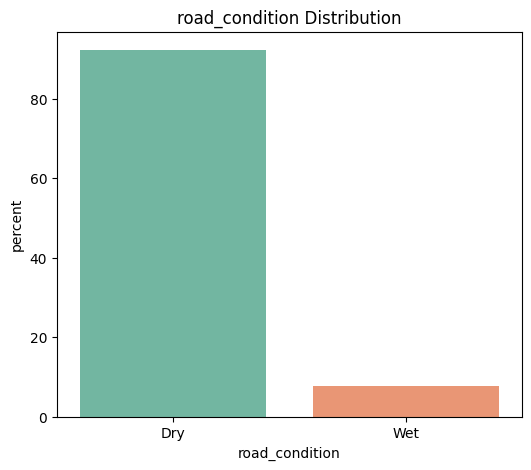

In [7]:
plot_categorical_distribution(df, 'road_condition', stat="percent")

In [13]:
df[Y].unique()

array(['B: Suspected Minor Injury', 'C: Possible Injury',
       'A: Suspected Serious Injury', 'K: Killed', 'O: No Injury'],
      dtype=object)

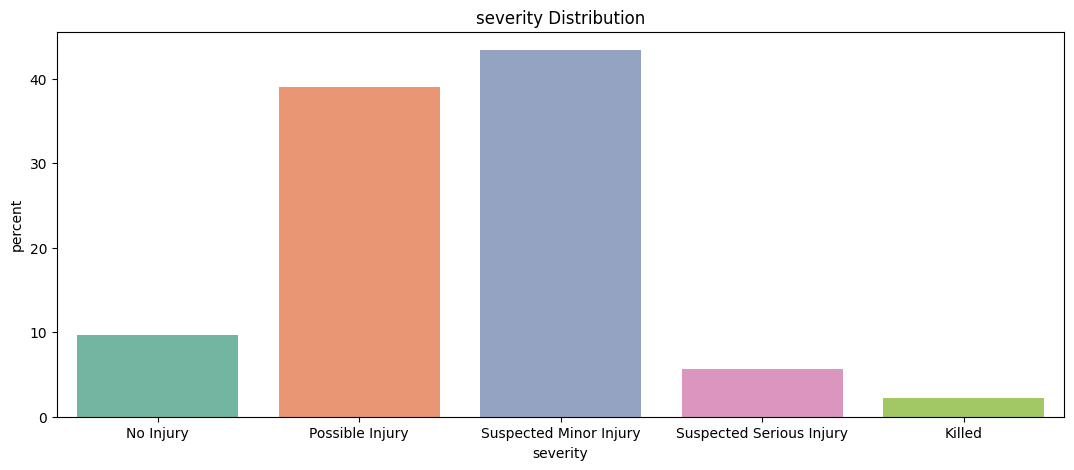

In [26]:
plot_categorical_distribution(df, Y, stat="percent", figsize=(13,5))

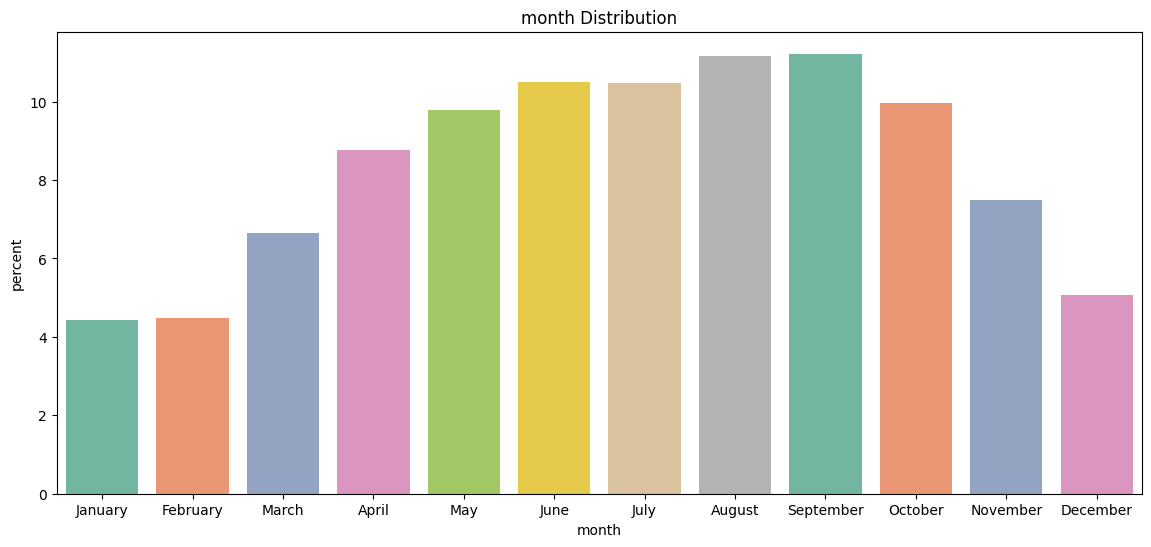

In [9]:
plot_categorical_distribution(df, 'month', stat="percent",  figsize=(14,6))

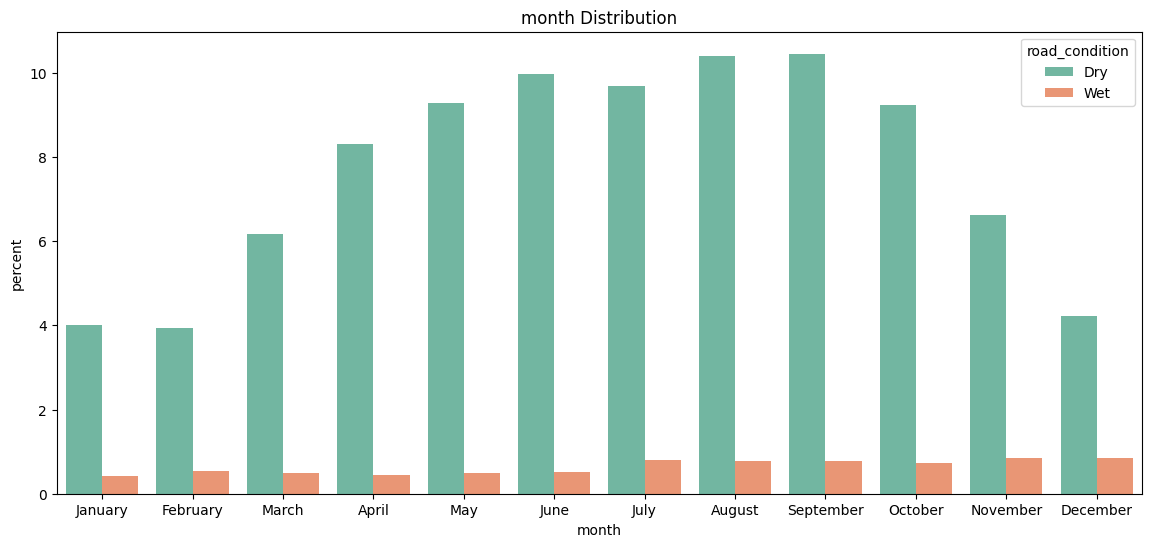

In [10]:
plot_categorical_distribution(df, 'month', stat="percent", hue='road_condition', figsize=(14,6))

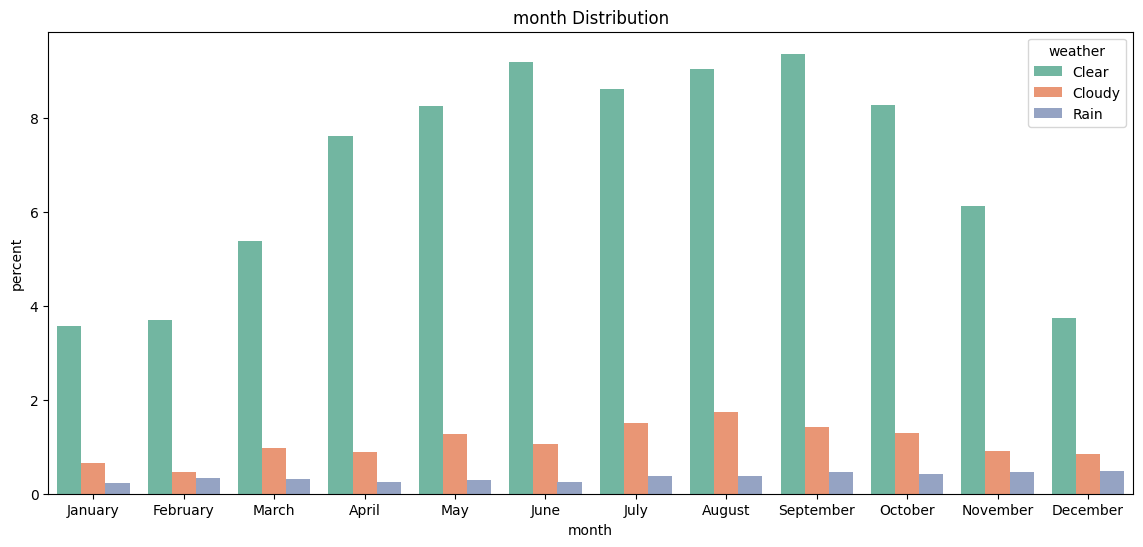

In [11]:
plot_categorical_distribution(df, 'month', stat="percent", hue='weather', figsize=(14,6))

In [12]:
dist_by_t, chi_by_t = print_independence_table(df, seperator_col=T_CATEGORY)
dist_by_y, chi_by_y = print_independence_table(df, seperator_col=Y)

In [13]:
calculate_distribution(df, row_column=T_CATEGORY, col_column='month')

month,April,August,December,February,January,July,June,March,May,November,October,September
road_condition,,,,,,,,,,,,
Dry,94.96,93.08,83.09,87.95,90.3,92.28,94.98,92.45,94.86,88.52,92.62,93.11
Wet,5.04,6.92,16.91,12.05,9.7,7.72,5.02,7.55,5.14,11.48,7.38,6.89


In [6]:
chi_by_t

,,Chi Square,p value
is_drunk_biker,is_drunk_biker,10.80,<0.05
biker_location,biker_location,7.03,0.071
gender,gender,8.38,<0.05
intersection_type,intersection_type,5.54,0.136
month,month,97.63,<0.05
is_drunk_driver,is_drunk_driver,0.20,0.657
vehicle_type,vehicle_type,5.69,0.128
light_condition,light_condition,209.71,<0.05
locality,locality,0.65,0.723
road_surface_type,road_surface_type,0.39,0.822


In [7]:
dist_by_t

value          \
road_condition                                                Dry           
variable                                                        %     No.   
is_drunk_biker    No                                        94.42  7102.0   
                  Yes                                        5.58   420.0   
biker_location    Bike Lane / Paved Shoulder                 7.23   544.0   
                  Non-Roadway                                7.95   598.0   
                  Sidewalk / Crosswalk / Driveway Crossing  18.68  1405.0   
                  Travel Lane                               66.14  4975.0   
gender            Female                                    15.63  1176.0   
                  Male                                      84.37  6346.0   
intersection_type Intersection                              46.60  3505.0   
                  Intersection-Related                       5.88   442.0   
                  Non-Intersection                          44.35  3336.0   
                  Non-Roadway                                3.18   239.0   
month             April                                      9.01   678.0   
                  August                                    11.26   847.0   
                  December                                   4.57   344.0   
                  February                                   4.27   321.0   
                  January                                    4.33   326.0   
                  July                                      10.49   789.0   
                  June                                      10.81   813.0   
                  March                                      6.67   502.0   
                  May                                       10.06   757.0   
                  November                                   7.18   540.0   
                  October                                   10.01   753.0   
                  September                                 11.33   852.0   
is_drunk_driver   No                                        98.42  7403.0   
                  Yes                                        1.58   119.0   
vehicle_type      Heavy Truck                                2.13   160.0   
                  Light Truck                               21.34  1605.0   
                  Passenger Vehicle                         75.87  5707.0   
                  Two-Wheeler                                0.66    50.0   
light_condition   Dark - Lighted Roadway                     9.37   705.0   
                  Dark - Roadway Not Lighted                 7.98   600.0   
                  Daylight                                  82.65  6217.0   
locality          Mixed (30% To 70% Developed)              14.20  1068.0   
                  Rural (<30% Developed)                    15.49  1165.0   
                  Urban (>70% Developed)                    70.31  5289.0   
road_surface_type Coarse Asphalt                            33.22  2499.0   
                  Concrete                                   2.55   192.0   
                  Smooth Asphalt                            64.22  4831.0   
weather           Clear                                     89.17  6707.0   
                  Cloudy                                    10.78   811.0   
                  Rain                                       0.05     4.0   

                                                                          
road_condition                                                Wet         
variable                                                        %    No.  
is_drunk_biker    No                                        91.14  576.0  
                  Yes                                        8.86   56.0  
biker_location    Bike Lane / Paved Shoulder                 5.38   34.0  
                  Non-Roadway                                6.49   41.0  
                  Sidewalk / Crosswalk / Driveway Crossing  17.25  10

In [8]:
chi_by_y

,,Chi Square,p value
is_drunk_biker,is_drunk_biker,127.88,<0.05
biker_location,biker_location,225.76,<0.05
gender,gender,17.41,<0.05
intersection_type,intersection_type,171.07,<0.05
month,month,99.34,<0.05
is_drunk_driver,is_drunk_driver,98.34,<0.05
vehicle_type,vehicle_type,62.54,<0.05
light_condition,light_condition,229.72,<0.05
locality,locality,274.93,<0.05
road_surface_type,road_surface_type,6.57,0.584


In [9]:
dist_by_y

value  \
severity                                                   A: Suspected Serious Injury   
variable                                                                             %   
is_drunk_biker    No                                                             87.80   
                  Yes                                                            12.20   
biker_location    Bike Lane / Paved Shoulder                                      8.28   
                  Non-Roadway                                                     6.75   
                  Sidewalk / Crosswalk / Driveway Crossing                        5.88   
                  Travel Lane                                                    79.08   
gender            Female                                                         16.56   
                  Male                                                           83.44   
intersection_type Intersection                                                   35.95   
                  Intersection-Related                                            5.88   
                  Non-Intersection                                               57.08   
                  Non-Roadway                                                     1.09   
month             April                                                          11.98   
                  August                                                         11.33   
                  December                                                        6.54   
                  February                                                        3.70   
                  January                                                         3.27   
                  July                                                           12.42   
                  June                                                            9.15   
                  March                                                           8.06   
                  May                                                             8.93   
                  November                                                        5.66   
                  October                                                        10.24   
                  September                                                       8.71   
is_drunk_driver   No                                                             96.51   
                  Yes                                                             3.49   
vehicle_type      Heavy Truck                                                     2.40   
                  Light Truck                                                    25.05   
                  Passenger Vehicle                                              71.90   
                  Two-Wheeler                                                     0.65   
light_condition   Dark - Lighted Roadway                                         11.55   
                  Dark - Roadway Not Lighted                                     15.47   
                  Daylight                                                       72.98   
locality          Mixed (30% To 70% Developed)                                   18.08   
                  Rural (<30% Developed)                                         32.46   
                  Urban (>70% Developed)                                         49.46   
road_surface_type Coarse Asphalt                                                 34.86   
                  Concrete                                                        1.96   
                  Smooth Asphalt                                                 63.18   
weather           Clear                                                          82.14   
                  Cloudy                                                         13.73   
                  Rain                                                            4.14   

                              

### Filter winters months

In [14]:
# 'November', 'January', 'February'
# 'April', 'June', 'May', 'August', 'September', 'October', 'July', 'March'
winter_month = ['November', 'December', 'January', 'February']
winter_df = df[df['month'].isin(winter_month)]

In [18]:
len(winter_df)

1750

In [20]:
winter_df[T_CATEGORY].value_counts()

Dry    1531
Wet     219
Name: road_condition, dtype: int64

In [15]:
calculate_distribution(winter_df, row_column=T_CATEGORY, col_column='month')

month,December,February,January,November
road_condition,,,,
Dry,83.09,87.95,90.3,88.52
Wet,16.91,12.05,9.7,11.48


In [16]:
filtered_dist_by_t, filtered_chi_by_t = print_independence_table(winter_df, seperator_col=T_CATEGORY)
filtered_chi_by_t

,,Chi Square,p value
is_drunk_biker,is_drunk_biker,1.87,0.172
biker_location,biker_location,4.53,0.209
gender,gender,1.58,0.209
intersection_type,intersection_type,9.81,<0.05
month,month,10.59,<0.05
is_drunk_driver,is_drunk_driver,0.00,1.0
vehicle_type,vehicle_type,2.49,0.477
light_condition,light_condition,38.94,<0.05
locality,locality,1.80,0.407
road_surface_type,road_surface_type,1.76,0.414


In [19]:
filtered_dist_by_t

value          \
road_condition                                                Dry           
variable                                                        %     No.   
is_drunk_biker    No                                        92.03  1409.0   
                  Yes                                        7.97   122.0   
biker_location    Bike Lane / Paved Shoulder                 8.16   125.0   
                  Non-Roadway                                6.07    93.0   
                  Sidewalk / Crosswalk / Driveway Crossing  18.03   276.0   
                  Travel Lane                               67.73  1037.0   
gender            Female                                    11.82   181.0   
                  Male                                      88.18  1350.0   
intersection_type Intersection                              43.24   662.0   
                  Intersection-Related                       6.34    97.0   
                  Non-Intersection                          47.42   726.0   
                  Non-Roadway                                3.00    46.0   
month             December                                  22.47   344.0   
                  February                                  20.97   321.0   
                  January                                   21.29   326.0   
                  November                                  35.27   540.0   
is_drunk_driver   No                                        98.43  1507.0   
                  Yes                                        1.57    24.0   
vehicle_type      Heavy Truck                                2.29    35.0   
                  Light Truck                               21.55   330.0   
                  Passenger Vehicle                         75.64  1158.0   
                  Two-Wheeler                                0.52     8.0   
light_condition   Dark - Lighted Roadway                    15.55   238.0   
                  Dark - Roadway Not Lighted                13.65   209.0   
                  Daylight                                  70.80  1084.0   
locality          Mixed (30% To 70% Developed)              13.59   208.0   
                  Rural (<30% Developed)                    16.79   257.0   
                  Urban (>70% Developed)                    69.63  1066.0   
road_surface_type Coarse Asphalt                            33.18   508.0   
                  Concrete                                   2.61    40.0   
                  Smooth Asphalt                            64.21   983.0   
weather           Clear                                     90.01  1378.0   
                  Cloudy                                     9.99   153.0   
                  Rain                                        NaN     NaN   

                                                                          
road_condition                                                Wet         
variable                                                        %    No.  
is_drunk_biker    No                                        89.04  195.0  
                  Yes                                       10.96   24.0  
biker_location    Bike Lane / Paved Shoulder                 4.57   10.0  
                  Non-Roadway                                7.76   17.0  
                  Sidewalk / Crosswalk / Driveway Crossing  20.09   44.0  
                  Travel Lane                               67.58  148.0  
gender            Female                                     8.68   19.0  
                  Male                                      91.32  200.0  
intersection_type Intersection                              47.03  103.0  
                  Intersection-Related                       9.13   20.0  
                  Non-Intersection                          38.36   84.0  
                  Non-Roadway                                5.48   12.0  
month             December                                  31.96   70.0  
          

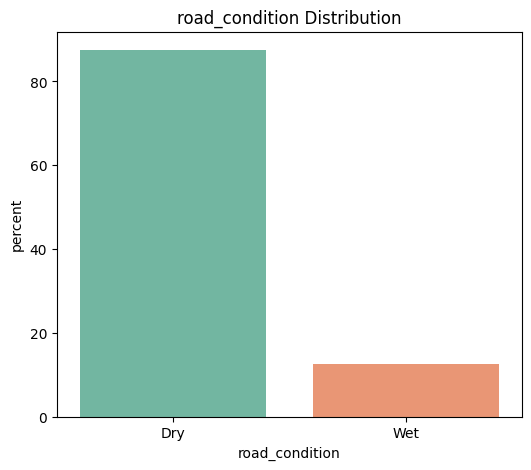

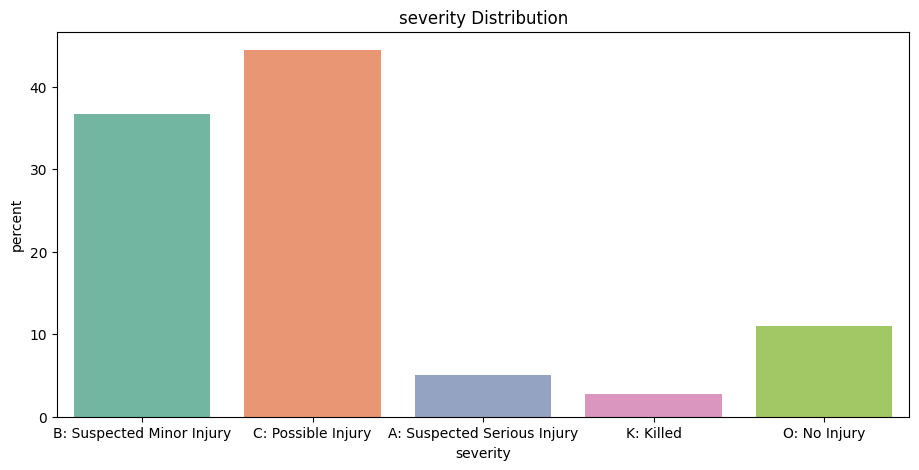

In [17]:
plot_categorical_distribution(winter_df, 'road_condition', stat="percent")
plot_categorical_distribution(winter_df, Y, stat="percent", figsize=(11,5))

In [28]:
filtered_dist_by_y, filtered_chi_by_y = print_independence_table(winter_df, seperator_col=Y)

In [29]:
filtered_chi_by_y

,,Chi Square,p value
is_drunk_biker,is_drunk_biker,40.81,<0.05
biker_location,biker_location,56.11,<0.05
gender,gender,6.88,0.143
intersection_type,intersection_type,61.92,<0.05
month,month,15.84,0.199
is_drunk_driver,is_drunk_driver,27.84,<0.05
vehicle_type,vehicle_type,28.33,<0.05
light_condition,light_condition,69.07,<0.05
locality,locality,56.00,<0.05
road_surface_type,road_surface_type,7.19,0.516
